# Preprocessing

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
data.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.0,0.0,0.488562,0.44761,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.0,0.0,0.425234,2.00000,False,True,False,False,True,1


In [4]:
clean_data = data
#dummy variables 
clean_data = pd.get_dummies(data, columns=['Race','Gender', 'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges',
                                    'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges',
                                    'Prior_Revocations_Parole','Prior_Revocations_Probation', 
                                    'Prison_Offense'],drop_first=True)

## Descriptive Statistics

In [6]:
#data for descriptive stats
descriptive_stats = clean_data[['Recidivism_Within_3years', 'Prior_Revocations_Probation_True', 'Prior_Revocations_Parole_True',
                      'Prior_Conviction_Episodes_PPViolationCharges_True', 'Prior_Conviction_Episodes_Viol_True',
                      'Prior_Arrest_Episodes_DVCharges_True', 'Gang_Affiliated_True', 'Gender_M',
                      'Supervision_Risk_Score_First', 'Percent_Days_Employed']].describe().T.round(3)
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Prior_Revocations_Probation_True,25835.0,0.146,0.353,0.0,0.0,0.000,0.000,1.0
Prior_Revocations_Parole_True,25835.0,0.096,0.294,0.0,0.0,0.000,0.000,1.0
Prior_Conviction_Episodes_PPViolationCharges_True,25835.0,0.328,0.469,0.0,0.0,0.000,1.000,1.0
Prior_Conviction_Episodes_Viol_True,25835.0,0.325,0.468,0.0,0.0,0.000,1.000,1.0
Prior_Arrest_Episodes_DVCharges_True,25835.0,0.165,0.371,0.0,0.0,0.000,0.000,1.0
Gang_Affiliated_True,25835.0,0.152,0.359,0.0,0.0,0.000,0.000,1.0
Gender_M,25835.0,0.877,0.328,0.0,1.0,1.000,1.000,1.0
Supervision_Risk_Score_First,25360.0,6.082,2.381,1.0,4.0,6.000,8.000,10.0
Percent_Days_Employed,25373.0,0.482,0.425,0.0,0.0,0.476,0.969,1.0


In [7]:
#defining function to export table to a document
def export_table(dataframe, name):
    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(dataframe.shape[0]+1, dataframe.shape[1])

    # add the header rows.
    for j in range(dataframe.shape[-1]):
        t.cell(0,j).text = dataframe.columns[j]

    # add the rest of the data frame
    for i in range(dataframe.shape[0]):
        for j in range(dataframe.shape[-1]):
            t.cell(i+1,j).text = str(dataframe.values[i,j])

    # save the doc
    doc.save(name)

In [8]:
#commenting out so it doesnt keep saving as i run all 
#export_table(descriptive_stats, 'num.docx')

In [9]:
#same as above for categorical data
categorical_data = data[['Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Race', 'Prison_Offense',
            'Dependents', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
            'Prior_Arrest_Episodes_Violent']].describe(include='all').T
categorical_data

,count,unique,top,freq
Age_at_Release,25835,7,23-27,5176
Supervision_Level_First,24115,3,Standard,9983
Education_Level,25835,3,High School Diploma,11390
Race,25835,2,BLACK,14847
Prison_Offense,22558,5,Property,8284
Dependents,25835,4,0,8037
Prison_Years,25835,4,1-2 years,8084
Prior_Arrest_Episodes_Felony,25835,11,10 or more,6140
Prior_Arrest_Episodes_Violent,25835,4,0,11049


In [10]:
#commenting out so it doesnt keep saving as i run all 
#export_table(categorical_data, 'cat.docx')

In [11]:
data.Education_Level.value_counts()

High School Diploma      11390
Less than HS diploma      9840
At least some college     4605
Name: Education_Level, dtype: int64

In [12]:
data.Prison_Offense.value_counts()

Property           8284
Violent/Non-Sex    5475
Drug               5190
Other              2779
Violent/Sex         830
Name: Prison_Offense, dtype: int64

In [13]:
data.Race.value_counts()

BLACK    14847
WHITE    10988
Name: Race, dtype: int64

## Graphs

In [14]:
def graph(df, col1, tick, title, xlab):
    #grouping and creating dataframe
    new= df.groupby([col1,'Recidivism_Within_3years']).size().reset_index()
    data =pd.DataFrame(new)
    #getting individual bar dfs to stack
    recidivism_false = data[data['Recidivism_Within_3years']==0]
    recidivism_true = data[data['Recidivism_Within_3years']==1]
    #graphing
    x_pos=np.arange(len(recidivism_false))
    tick_labels = tick
    plt.figure(figsize=(10, 8))
    plt.bar(x_pos - 0.2, recidivism_false[0], width=0.4, label='Recidivism False', color='#4f674f')
    plt.bar(x_pos + 0.2, recidivism_true[0], width=0.4, label='Recidivism True', color = '#b7cdb7')
    plt.xticks(x_pos, tick_labels)
    plt.title(title,  fontdict={'fontsize': 20})
    plt.xlabel(xlab,  fontdict={'fontsize': 16})
    plt.ylabel("Count", fontdict={'fontsize': 16})
    plt.legend()
    #commenting out so it doesnt keep saving as i run all 
    #plt.savefig('education_level.png')
    return  plt.show()

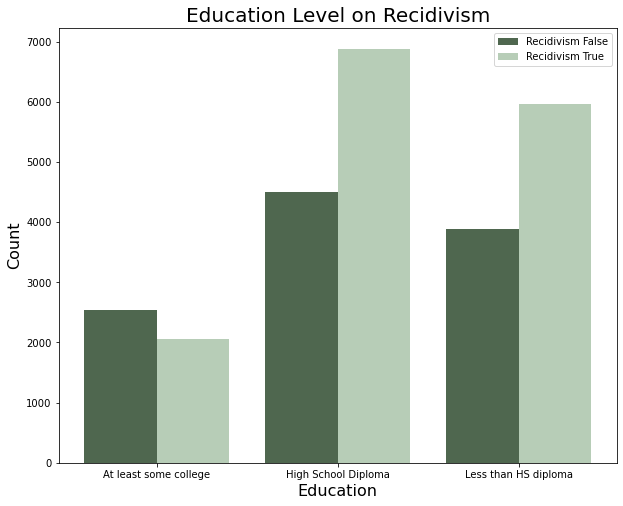

In [19]:
ticks = ['At least some college','High School Diploma','Less than HS diploma']
title= "Education Level on Recidivism"
xlab= "Education"
graph(clean_data, 'Education_Level', ticks, title, xlab)

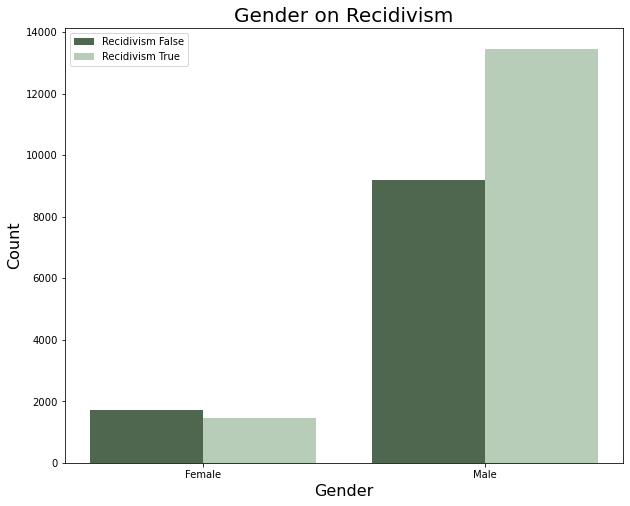

In [20]:
ticks= ['Female','Male']
title= 'Gender on Recidivism'
xlab= 'Gender'
graph(clean_data, 'Gender_M', ticks, title,xlab)

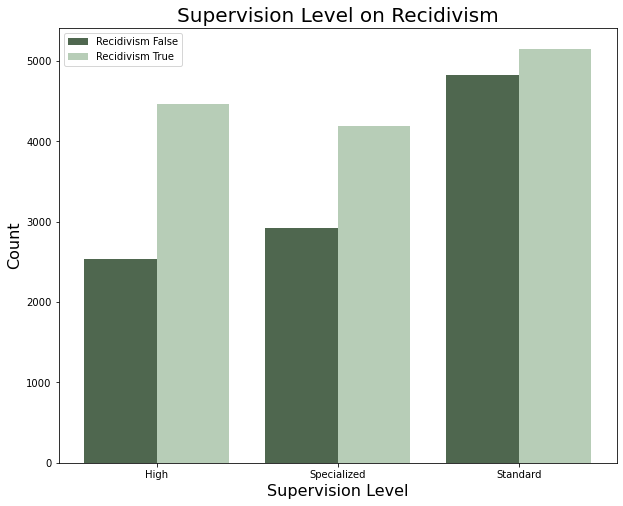

In [21]:
ticks= ['High','Specialized', 'Standard']
title= 'Supervision Level on Recidivism'
xlab= 'Supervision Level'
graph(clean_data, 'Supervision_Level_First', ticks, title,xlab)

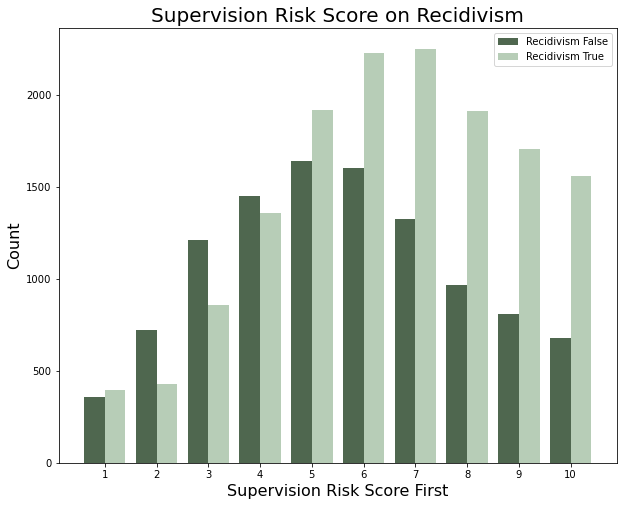

In [23]:
ticks= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
title= 'Supervision Risk Score on Recidivism'
xlab= 'Supervision Risk Score First'
graph(clean_data, 'Supervision_Risk_Score_First', ticks, title,xlab)